## Exploratory Data Analysis (EDA)

The objective is to use some of the EDA techniques and features in Python to predict price of cars. The Automobile Dataset is selected from an online source. 

The main question is, using the dataset, what are the main characteristics which have the most impact on the car price?

In [5]:
#importing libraries: 
import pandas as pd
import numpy as np

#loading data and store it in datafram df:

URL='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df=pd.read_csv(URL)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Now I'm going to analyze individual feature patterns using visualization.

To install Seaborn Im going to use pip which is the Python package manager.

In [34]:
%%capture
! pip install seaborn

In [35]:
#importing Matplotlib and Seaborn visualization packages:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First, let's see what type of data we have in order to pick the best visualization methods.

In [36]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


The correlation between the int64 and float64 data types can be summarized using the corr() method:

In [37]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [41]:
#Looking at the correlations between 'bore','stroke' ,'compression-ratio',and 'horsepower':
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


To analyze continuous numerical values it's a good idea to use the scatterplot and the regression line for better visualization of the data. Here, I'm going to use a scatterplot to show the correlation between the 'engine-size' and 'price' in cars:

(0.0, 53401.53230713849)

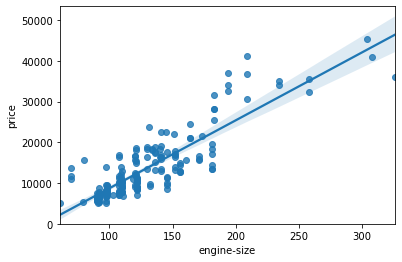

In [42]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

As the engine size increases so as the price! Thus, there's a positive linear correlation between the engine size and price.

The plot shows that the engine size is a good indicator of predicting price. But if we need to know the correlation coefficient we can use the .corr() method to calculate it as shown below:

In [43]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


The correlation coefficient is 0.87 which again refers to a positive linear relationship between the two variables.

Another good gues is the 'highway-mpg'! highway mpg can affect the price in a car! 
Using the scatterplot and also calculating the correlation coefficient can give us more insight.

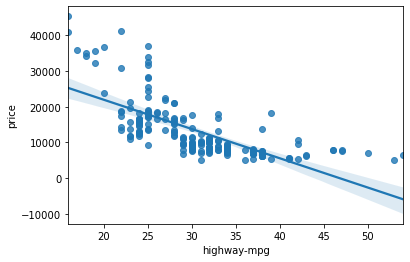

In [44]:
#the scatterplot of 'highway-mpg' vs. 'price':
sns.regplot(x='highway-mpg', y='price', data=df)

In [45]:
#calculating the correlation coefficient of 'highway-mpg' and 'price':

df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


From the scatterplot we can see that as the highway mpg increases the price dropps (as we expected!!). The correlation coef. is also -0.70 which is another indicator of a negative linear relationship between the two variables.

Let's do the same process for the peak-rpm and see if it's another good predictor variable of price!?

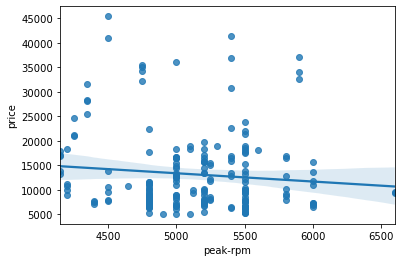

In [46]:
#the scatterplot of peak-rpm vs price:
sns.regplot(x='peak-rpm', y='price', data=df)

From the scatterplot it seems that the peak-rpm is not a good predictor variable of price. Now let's calculate the correlation coefficient and see if our observation is going to be confirmed!

In [47]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


The correlation coefficient is -0.10 which shows a weak relationship between two variables.

Next, I'm going to examine 'stroke' to see if it's a realiable variable to predict the price:

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


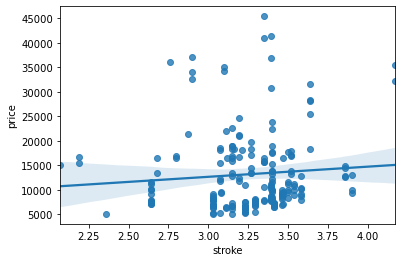

In [48]:
sns.regplot(x='stroke', y='price', data=df)
df[["stroke","price"]].corr()

Again the correlation coef. is way smaller than 1 (or -1), and also the regression line is almost horrizontal (data is scattered as well!). Thus, stroke is not a reliable predictor variable of price!

## Categorical Variables

Now I'm going to experiment with some of the categorial data in the dataset.These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categoriacal variables is through boxplots!



I'm going to use a boxplot to visualiza the role of 'body-style' on 'price':

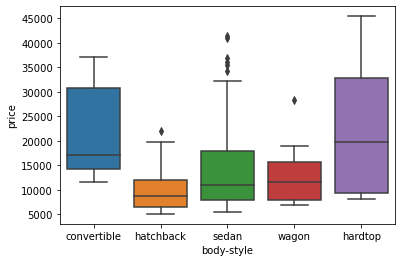

In [49]:
#boxplot pf 'body-style' vs 'price'
sns.boxplot(x='body-style', y='price', data=df)

Based on the boxplot, the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. 

Now I'm going to examine the role of the engine-location on price:

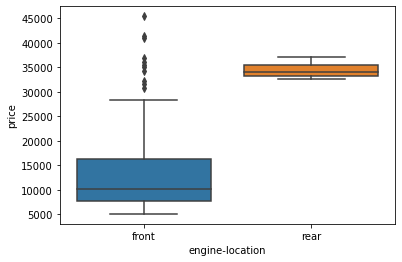

In [50]:
#boxplot of 'engine-location' vs. 'price'
sns.boxplot(x='engine-location', y='price', data=df)

It is shown that cars with rear engine locations have definately higher price range! 
The data seems distinct enough to conider 'engine-location' as a good predictor variable of price.

Now going to take a look at the 'drive-wheels' vs. the 'price':

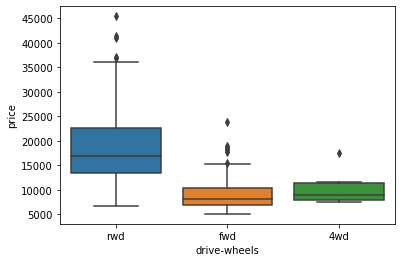

In [51]:
#boxplot of 'drive-wheels' vs. 'price':
sns.boxplot(x='drive-wheels', y='price', data=df)

We can see that the price distribution varias among the different drive wheels and so we can consider this category a predictor variable.

## Descriptive Statistical Analysis

By using the .describe() method we can have a summary statistics of all continuous variables (it automatially skips the NaN values, and also the object types!)

In [52]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [53]:
#to include the object types in the description we can use:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [54]:
#using the .value_counts() method to count elements in the 'drive-wheels'
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Let's use the same method to take a look at the value counts in the 'engine-location':

In [55]:
# value counts in engine-location and adjusting the index name

engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


The value counts for the 'rear' engine is only 3! this is such a low number of data input thus the results can be skewed if we use the 'engine-location' as an indicator of price!

## Grouping

The gourpby method can group data based on different categories.

As an example I'm going to look at different categories in column 'dive-wheels':

In [56]:
#using .unique() method to see the different categories:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

It shows us that there are three unique categories in the selected column.

The .groupby() method combined with .mean() can show us the average price of each drive-wheels categories:

In [57]:
df_dw_group=df[['drive-wheels', 'price']]
df_dw_group=df_dw_group.groupby(['drive-wheels'], as_index=False).mean()
df_dw_group

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


So based on the outpt, on average the rear-wheel-drive cars are more expensive. While the 4-wheel and front-wheel drives prices are pretty comparable.

We can also select multiple groups to do so! Let's add the 'body-style' to the mix and compare the average prices:

In [58]:
df_group_1=df[['drive-wheels','body-style', 'price']]
df_group_1=df_group_1.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_group_1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


To be able to visualize it better we can use a pivot table:

In [60]:
df_grp_pivot=df_group_1.pivot(index='drive-wheels', columns='body-style')
df_grp_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Correlation

Correlation is a measure of the extent of interdependence between variables.We can use the Pearson Correlation to measure the linear dependancy of the two variables. In some of the examples above, the .corr() method was used to calculate the correlation between the variables. this method is based on the Pearson Correlation.

"Sometimes we would like to know the significant of the correlation estimate. That's when we use the p-value:
The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant."

"By convention, when the\
    p-value is < 0.001: we say there is strong evidence that the correlation is significant.\
    the p-value is < 0.05: there is moderate evidence that the correlation is significant.\
    the p-value is < 0.1: there is weak evidence that the correlation is significant.\
    the p-value is > 0.1: there is no evidence that the correlation is significant."


We can get this information from the scipy library using the stats module:

In [2]:
from scipy import stats

In this section, the Pearson Correlation coefficient and p-value is going to be calculated for several variables vs. price:

In [3]:
#Wheel-base vs price:
pearson_coef,p_value=stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation coefficient is", pearson_coef, "and the p-value equals", p_value)

NameError: name 'df' is not defined

Since the p-value is << 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

In [ ]:
#horsepower vs price
pearson_coef,p_value=stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation coefficient is", pearson_coef, "and the p-value equals", p_value)

From the p-value the correlation is statistically significant, and based on the Pearson Correlation coefficient it's a positive linear relationship.

In [4]:
#width vs price
pearson_coef,p_value=stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation coefficient is", pearson_coef, "and the p-value equals", p_value)

NameError: name 'df' is not defined

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [67]:
#length vs price
pearson_coef,p_value=stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation coefficient is", pearson_coef, "and the p-value equals", p_value)

The Pearson Correlation coefficient is 0.6906283804483639 and the p-value equals 8.016477466159328e-30


The linear relationship is slightly weaker compared to width vs price (~0.69) however it is still moderately strong, but the p-value represents a statistically significant relationship.

In [6]:
#curb-weight vs price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702844  with a P-value of P =  2.189577238893878e-53


Since the p-value is way below .001 the statistical relation between the two variables is significant. The Pearson Correlation coef. is 0.834 which refers to a positive linear relationship.

In [7]:
#engine-size vs price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


The linear relation is strong (Pearson Correlation coef. of 0.87), and the p-value refers to the engine-size and price having statistically a significant correlation.

In [8]:
#bore vs price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


Based on the output, although the statistical correlation is significant, the linear relationship is moderate between the two variables.

In [9]:
#city-mpg and price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


Based on the p-value the statistical correlation is significant, and the Pearson Corr. Coef. of -0.68 signifies a negarive and moderately strong linear relationship between the two variables.
One would think that the higher the city-mpg the higher the price! But our data is actually showing the city-mpg and price to have a negative linear relationship; meaning the lower city-mpg the higher the price!! This might be due to some of the high-end cars! For example the sport cars have a lower city-mpg on average, however they can get pretty pricey!

In [10]:
#highway-mpg and price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


Since the p-value is way smaller than 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of -0.705 shows that the relationship is negative and moderately strong. 

In conclusion we got to analyze and visualize our data which helped us understand our dataset more. Now we have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. 